# Introduction

In order to find the best neighborhood in Pittsburgh, we looked for the safest neighborhood a developing child should be raised in. Building a safe, supportive, positive community during early childhood becomes the foundation for a child's future. This facilitates their self-discovery. It helps them learn how to tackle challenges, build their knowledge, and flourish. For the first dataset we used fatal accidental overdoses, for the second dataset we used fire incidents and for the third we used police arrests in city of Pittsburgh.

# Metric Goal
We both came up with the top neighborhood from our datasets to determine which was the best neighborhood. Our goal was to find the neighborhood with fewer police arrest, fewer fatal accidental overdoses, as well as a low fire incidents. 

# Metric #1:Fatal accidental Overdoses-Mercy Abodunrin

In [32]:
# https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses

In [33]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
# Importing Data
fatalfile=pd.read_csv("fatal_overdose.csv")

fatalfile.head(10)

fatal_in_neighborhood = dict()

for index, row in fatalfile.iterrows():
    fatal = row['manner_of_death']
    


In [35]:
typeOf = fatalfile['incident_zip'].value_counts()

typeOf.head(10)

15210    296
15212    239
15136    179
15235    164
15132    158
15216    154
15227    148
15221    141
15206    132
15120    122
Name: incident_zip, dtype: int64

# Graphing how many adults accidently overdosed per neighborhood

Text(0, 0.5, 'Amount of Accidents')

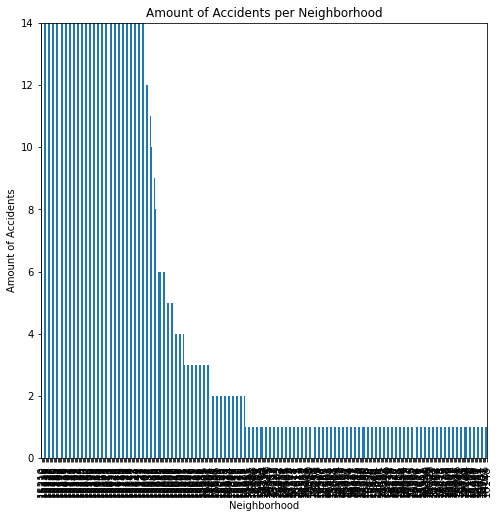

In [36]:
rateOfacci =  fatalfile['incident_zip'].value_counts()
rateOfacci.plot(kind="bar", ylim=[0,14], figsize=(8,8))
plt.title("Amount of Accidents per Neighborhood" )
plt.xlabel("Neighborhood")
plt.ylabel("Amount of Accidents")

## Analysis


Kids are vastly influenced by those around them, we used the zipcode of where the incident happened as an indicator to show how many people accidently overdosed per neighborhood(zip code). We determined that the neighborhood with the least amount of adults that accidently overdosed is the safest neighborhood which makes it the best. By those standards: (1)New Homestead, (2)Larimer, and (3)Regent sqaure were the best.


# Metric #2: Fire Accidents-Moshood Adebule

In [63]:
fireIncidents = pd.read_csv("fire_incidents.csv")
fireIncidents.head()


,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [64]:
fireIncidents["neighborhood"].value_counts().tail(50)

Manchester              68
Troy Hill               67
Point Breeze            66
Elliott                 62
Northview Heights       60
West Oakland            57
North Shore             57
Banksville              57
Allegheny Center        56
Lincoln Place           54
Stanton Heights         54
Homewood West           53
Overbrook               51
Lower Lawrenceville     50
Strip District          49
Fineview                46
Point Breeze North      46
Arlington               45
Upper Hill              44
Upper Lawrenceville     44
Allegheny West          39
Bedford Dwellings       38
Chateau                 38
Polish Hill             36
Duquesne Heights        35
California-Kirkbride    35
Morningside             31
Friendship              29
Fairywood               23
Westwood                23
South Shore             22
Spring Garden           22
Glen Hazel              20
New Homestead           20
Summer Hill             20
West End                19
Esplen                  19
H

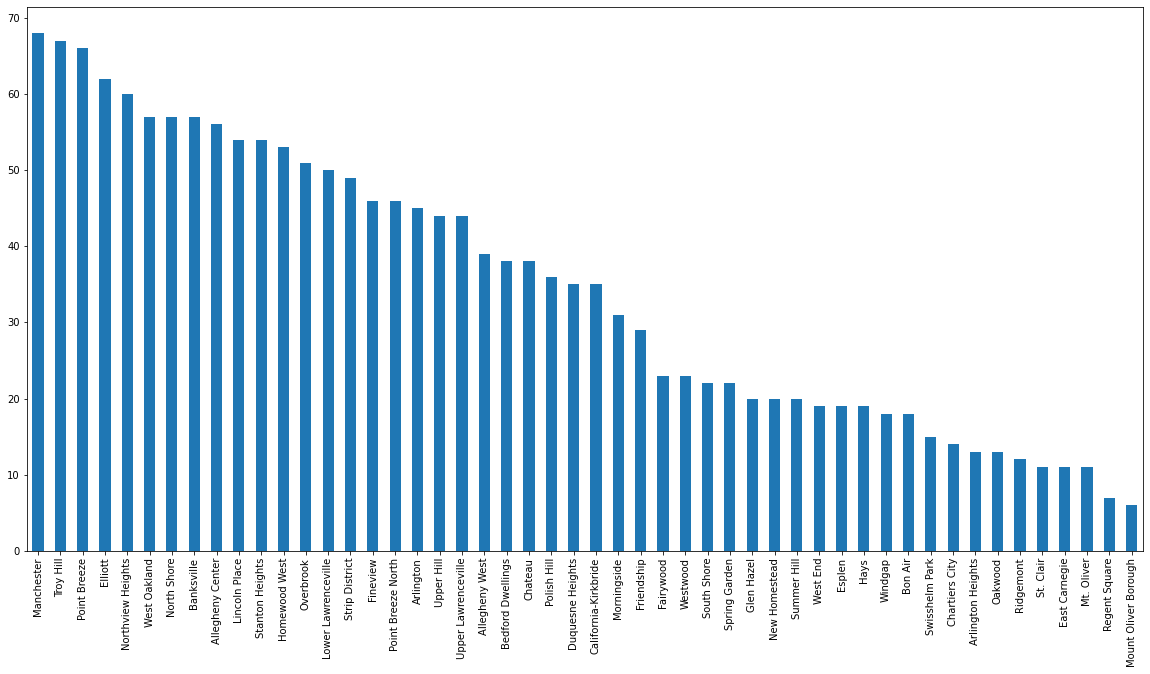

In [65]:
fireIncidents["neighborhood"].value_counts().tail(50).plot(kind="bar", figsize=(20, 10))

## Analysis

Based on the results from running the data set and what shows on the graph, I realized that Mount Oliver Borough, Regent Square and Mt. Oliver are the safest to live due to the low fire incidents. They experience the least amount of fires whereas Manchester and Troy-hill has proven to be the most dangerous fire wise and experience the most in Pittsburgh.

# Metric #3: Police Arrests

In [66]:
# Import data
police_arrests = pd.read_csv("police-arrest.csv")

police_arrests.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Amount')

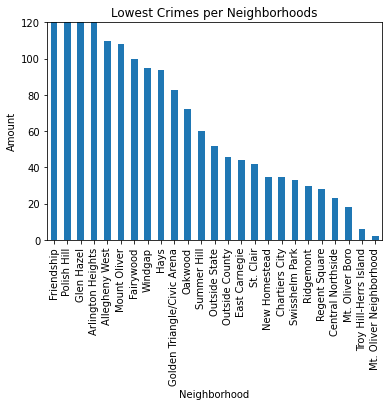

In [67]:
# Get data related to arrests within certain neighborhoods, then plot that data
rates = police_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
rates.tail(25).plot(kind="bar", ylim=[0,120])
plt.title("Lowest Crimes per Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

## Analysis

Based on the results of this code, I found that Mount Oliver Neighborhood, Troy Hill-Herrs, and Mount Oliver Borouugh were most safe due to the fact that they recived the lowest amount of crimes whereas Freindship, Polish Hill, Glen Hazel and more were worst neighborhood crime wise.

Graphical Data

In [41]:
# Read in new data set, print out first 10 instances
major_arrests = pd.read_csv("arrests-for-major-crimes-1972.csv")
major_arrests.head(10)

,neighborhood,population,overall_crime_rate,number_arrests_murder,crime_rate_murder,number_arrests_rape,crime_rate_rape,number_arrests_robbery,crime_rate_robbery,number_arrests_assault,crime_rate_assault,number_arrests_burglary,crime_rate_burglary,number_arrests_larceny,crime_rate_larceny
0,31st Ward,7594,2.03,0,0.00,1,0.01,7,0.09,45,0.60,55,0.73,45,0.60
1,Allegheny Center,588,52.04,0,0.00,2,0.34,24,4.08,30,5.10,14,2.38,236,40.14
2,Allegheny West,1159,14.33,1,0.09,3,0.26,16,1.38,17,1.47,53,4.57,76,6.56
3,Allentown,5042,3.13,0,0.00,1,0.08,23,0.46,41,0.81,48,0.95,45,0.89
4,Arlington,4758,2.50,0,0.00,0,0.00,7,0.15,33,0.69,44,0.92,35,0.74
5,Arlington Heights,1989,6.19,0,0.00,2,0.10,14,0.70,61,3.07,21,1.06,25,1.26
6,Banksville,6235,1.94,0,0.00,2,0.03,8,0.13,8,0.13,53,0.85,50,0.80
7,Bedford Dwellings,3635,2.64,1,0.03,4,0.11,11,0.30,25,0.69,36,0.99,19,0.52
8,Beechview,12965,1.98,1,0.01,1,0.01,26,0.20,43,0.33,84,0.65,101,0.78
9,Beltzhoover,5980,6.37,1,0.02,3,0.05,63,1.05,58,0.97,121,2.02,135,2.26


Text(0, 0.5, 'Amount')

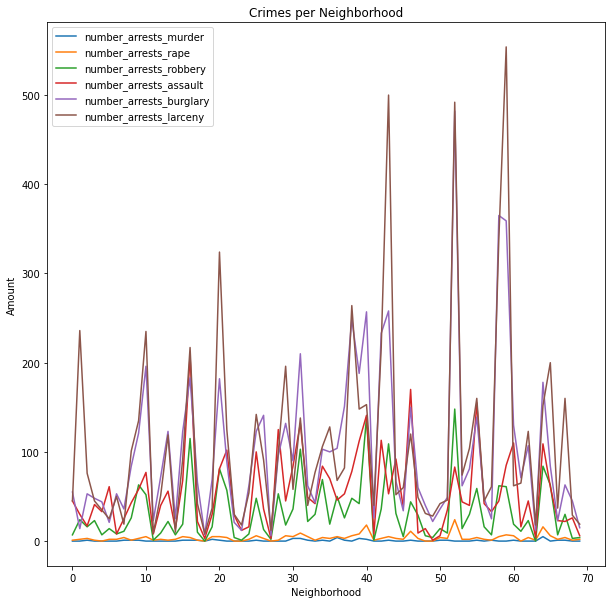

In [42]:
a_murder = major_arrests['number_arrests_murder']
a_rape = major_arrests['number_arrests_rape']
a_rob = major_arrests['number_arrests_robbery']
a_assault = major_arrests['number_arrests_assault']
a_burglary = major_arrests['number_arrests_burglary']
a_larceny = major_arrests['number_arrests_larceny']

arrests_total = pd.concat([arrests_murder, arrests_rape, arrests_robbery, arrests_assault, arrests_burglary, arrests_larceny], axis=1)
arrests_total.plot(figsize=(10, 10))

plt.title("Crimes per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

Analysis
Based on the results of this code, I found that Mount Oliver Neighborhood, Troy Hill-Herrs, and Mount Oliver Borouugh were most safe due to the fact that they recived the lowest amount of crimes whereas Freindship, Polish Hill, Glen Hazel and more were worst neighborhood crime wise.

# Conclusion

In [68]:
lowfireincidents= []
for neighborhood in fireIncidents["neighborhood"].value_counts().tail(35).index.tolist():
    if isinstance(neighborhood, str):
        lowfireincidents.append(neighborhood)
        
print(lowfireincidents)

['Fineview', 'Point Breeze North', 'Arlington', 'Upper Hill', 'Upper Lawrenceville', 'Allegheny West', 'Bedford Dwellings', 'Chateau', 'Polish Hill', 'Duquesne Heights', 'California-Kirkbride', 'Morningside', 'Friendship', 'Fairywood', 'Westwood', 'South Shore', 'Spring Garden', 'Glen Hazel', 'New Homestead', 'Summer Hill', 'West End', 'Esplen', 'Hays', 'Windgap', 'Bon Air', 'Swisshelm Park', 'Chartiers City', 'Arlington Heights', 'Oakwood', 'Ridgemont', 'St. Clair', 'East Carnegie', 'Mt. Oliver', 'Regent Square', 'Mount Oliver Borough']


In [69]:
least_crime_neighborhood = []
for n in police_arrests.index.tolist():
    least_crime_neighborhood.append(n)
    
print(least_crime_neighborhood)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [70]:
most_accidents = []
for p in fatalfile["incident_zip"].value_counts().head(35).index.tolist():
    most_accidents.append(p)
    
print(most_accidents)

['15210', '15212', '15136', '15235', '15132', '15216', '15227', '15221', '15206', '15120', '15205', '15219', '15202', '15106', '15108', '15226', '15211', '15236', '15025', '15201', '15207', '15237', '15146', '15122', '15147', '15203', '15209', '15214', '15224', '15204', '15215', '15104', '15223', '15220', '15084']


In [ ]:
# the zipcodes that appeared the most, had the most adults that accidently overdosed

# Regent Square is the best neighborhood in Pittsburgh

We chose the top 3 lowest accidental overdoses reported neighborhoods in Pittsburgh and compared them to the other metrics, while comparing them, Regency obviously was a clear cut answer for BEST neighborhood due to its problems being low across every dataset. 
Regent Sqaure zip code is 15221
